In [2]:
import numpy  as np
import pandas as pd

print('numpy  version - ' , np.__version__) 
print('pandas version - ' , pd.__version__) 

from   io import StringIO
import missingno as msno
# ml
import sklearn
from   sklearn.datasets import load_iris, load_breast_cancer

print('sklearn version - ' , sklearn.__version__)

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold , cross_val_score, cross_validate, GridSearchCV 
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier         
from sklearn.linear_model    import LogisticRegression , LinearRegression


from sklearn.metrics         import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer , precision_recall_curve 
from sklearn.impute          import SimpleImputer

from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# unsupervised learning
from sklearn.cluster import KMeans

numpy  version -  1.20.3
pandas version -  1.3.4
sklearn version -  0.24.2


#### cluster(군집화)
- 데이터 포인트들을 별개의 군집으로 그룹화하는 것을 의미함.
- 유사성이 높은 데이터들을 동일한 그룹으로 분류하고 서로 다른 군집들이 상이성을 가지도록 하는 알고리즘

In [4]:
cluster_frm = pd.DataFrame(columns=('x','y'))
cluster_frm.loc[0] = [7,1]
cluster_frm.loc[1] = [2,1]
cluster_frm.loc[2] = [4,2]
cluster_frm.loc[3] = [9,4]
cluster_frm.loc[4] = [10,5]
cluster_frm.loc[5] = [10,6]
cluster_frm.loc[6] = [11,5]
cluster_frm.loc[7] = [11,6]
cluster_frm.loc[8] = [15,3]
cluster_frm.loc[9] = [15,2]
cluster_frm.loc[10] = [16,6]
cluster_frm.loc[11] = [16,1]
cluster_frm

,x,y
0,7,1
1,2,1
2,4,2
3,9,4
4,10,5
5,10,6
6,11,5
7,11,6
8,15,3
9,15,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


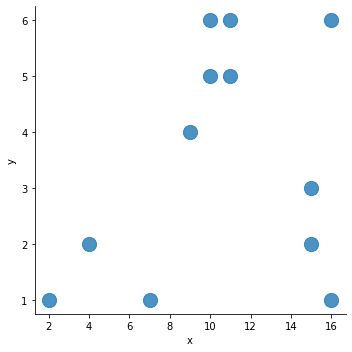

In [5]:
sns.lmplot( 'x' , 'y' , 
            data = cluster_frm,
            fit_reg = False ,
            scatter_kws = {'s' : 200})
plt.show()
plt.close()

In [7]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(cluster_frm)

KMeans(n_clusters=3)

In [10]:
print('type - ' , type(kmeans) )
print('type - ' , type(kmeans.labels_))

type -  <class 'sklearn.cluster._kmeans.KMeans'>
type -  <class 'numpy.ndarray'>


In [11]:
cluster_frm['cluster_id'] = kmeans.labels_
cluster_frm

,x,y,cluster_id
0,7,1,2
1,2,1,2
2,4,2,2
3,9,4,0
4,10,5,0
5,10,6,0
6,11,5,0
7,11,6,0
8,15,3,1
9,15,2,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


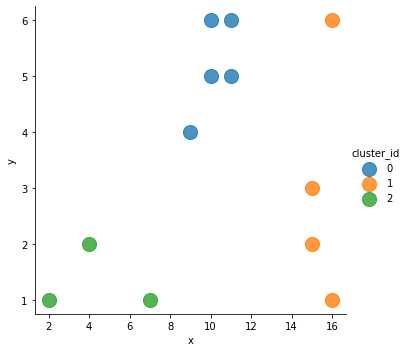

In [12]:
sns.lmplot( 'x' , 'y' , 
            data = cluster_frm,
            fit_reg = False ,
            scatter_kws = {'s' : 200},
            hue = 'cluster_id')
plt.show()
plt.close()

In [13]:
from sklearn.datasets import make_blobs
print('분류용 가상 데이터 생성 - ')

X, y = make_blobs(n_samples  = 300 , 
                  n_features = 2   , 
                  centers    = 3   ,
                  random_state = 100)

분류용 가상 데이터 생성 - 


In [14]:
X

array([[-1.04844640e+01, -7.96790222e+00],
       [-3.39076283e+00,  7.07786537e+00],
       [-1.03572951e+01, -8.70615998e+00],
       [-8.15044871e+00, -7.96418322e+00],
       [-9.03956370e+00, -6.77732260e+00],
       [-2.13452037e+00,  6.78552725e+00],
       [ 6.78603005e-01, -4.17761085e+00],
       [-9.89275599e+00, -8.91712947e+00],
       [-1.22046374e-01,  5.16013150e+00],
       [-1.08998240e+00, -4.56741361e+00],
       [ 1.21168542e+00,  4.92265860e+00],
       [ 2.51469464e-01, -3.66942865e+00],
       [-2.05814047e+00,  6.84288768e+00],
       [ 1.09049844e+00, -5.87582929e+00],
       [ 1.33439820e+00, -4.16262506e+00],
       [-8.07463680e-01,  5.61161784e+00],
       [ 1.10594346e+00, -4.41906375e+00],
       [ 9.37238113e-02,  7.90841888e+00],
       [ 9.76970826e-01, -4.40432866e+00],
       [-1.04164861e+01, -1.03206552e+01],
       [-9.88895050e+00, -8.20004984e+00],
       [ 5.41860777e-01, -4.37693628e+00],
       [ 1.54081964e+00, -4.53702344e+00],
       [ 1.

In [15]:
y

array([2, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0,
       0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       1, 2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 1, 2, 1,
       0, 2, 0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 0, 0,
       2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 2, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1,
       1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 1, 2,
       0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2,
       1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0])

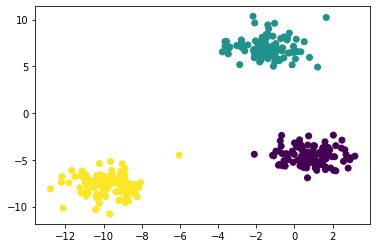

In [19]:
plt.scatter(X[ : , 0], X[ : , 1] , marker="o" , c=y)

plt.show()
plt.close()

In [20]:
feature , label = make_blobs(random_state = 100)

In [21]:
feature

array([[ 3.36818459e-01, -3.40287961e+00],
       [-9.48324266e+00, -8.66266052e+00],
       [-1.93336328e+00,  5.70953908e+00],
       [-1.00318241e+01, -5.57834393e+00],
       [ 5.41860777e-01, -4.37693628e+00],
       [-8.12962929e+00, -7.05554321e+00],
       [-7.30825786e-01,  7.32375552e+00],
       [-1.84142532e+00,  6.20630467e+00],
       [ 4.10071850e-01, -3.99744881e+00],
       [-8.73509589e+00, -5.49090535e+00],
       [ 1.84941962e+00, -3.91839346e+00],
       [-9.15256069e+00, -9.17805648e+00],
       [-3.21429939e+00,  5.75926164e+00],
       [ 2.84503785e-01, -3.61576523e+00],
       [-9.29074849e-01,  5.79099955e+00],
       [ 3.66925242e-01,  6.51861930e+00],
       [ 1.59909918e+00, -3.07105617e+00],
       [-9.71270568e+00, -7.91707651e+00],
       [-1.00804044e+01, -6.55135324e+00],
       [ 1.10594346e+00, -4.41906375e+00],
       [ 2.48708050e+00, -2.89100712e+00],
       [ 5.87148931e-03, -3.18314256e+00],
       [ 1.61854360e+00, -4.88855923e+00],
       [-9.

In [22]:
label

array([0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0])

In [24]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(feature)

KMeans(n_clusters=3)

In [25]:
kmeans.labels_

array([0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0])

In [26]:
kmeans.predict(feature)

array([0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0])

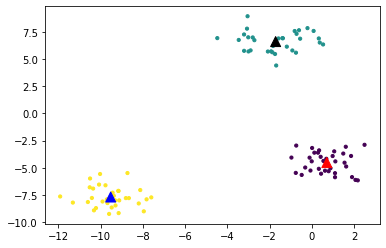

In [32]:
plt.scatter(feature[ : , 0] , feature[ : , 1],
            marker = 'o' , 
            c = kmeans.labels_ , 
            s = 10)

plt.scatter(kmeans.cluster_centers_[ : , 0] , kmeans.cluster_centers_[ : , 1],
            marker = '^' , 
            c = ['r', 'k' , 'b'] , 
            s = 100)

plt.show()
plt.close()

In [30]:
kmeans.cluster_centers_

array([[ 0.70353328, -4.52767455],
       [-1.72134158,  6.61045437],
       [-9.52981151, -7.69781936]])

- iris clustering

In [33]:
iris = load_iris()
iris_frm = pd.DataFrame(data    = iris.data , 
                        columns = iris.feature_names)
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
iris_kmeans = KMeans(n_clusters = 3 , 
                     verbose    = 1 , 
                     init       = 'k-means++' , 
                     max_iter   = 300 ) 
iris_kmeans.fit(iris_frm)

Initialization complete
Iteration 0, inertia 113.32
Iteration 1, inertia 79.19183885441781
Iteration 2, inertia 78.851441426146
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 105.83999999999999
Iteration 1, inertia 85.37089719658644
Iteration 2, inertia 79.86398439527464
Iteration 3, inertia 79.19714263977781
Iteration 4, inertia 78.851441426146
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 146.79999999999998
Iteration 1, inertia 84.60230806541558
Iteration 2, inertia 79.86398439527464
Iteration 3, inertia 79.19714263977781
Iteration 4, inertia 78.851441426146
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 115.02000000000001
Iteration 1, inertia 84.47219830938286
Iteration 2, inertia 83.77119920961835
Iteration 3, inertia 82.72701093072982
Iteration 4, inertia 81.54360278471792
Iteration 5, inertia 80.80637599999999
Iteration 6, inertia 79.87357983461304


KMeans(n_clusters=3, verbose=1)

In [38]:
iris_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [39]:
iris_kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [40]:
iris_kmeans.predict(iris_frm)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [42]:
iris_frm['cid'] = iris_kmeans.labels_
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [43]:
iris_frm['target'] = iris.target
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,1,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [48]:
print('cid를 기준으로 sepal length 의 빈도를 확인 한다면? -')
iris_frm.groupby(['cid' , 'target'])['sepal length (cm)'].count()

cid를 기준으로 sepal length 의 빈도를 확인 한다면? -


cid  target
0    0         50
1    1         48
     2         14
2    1          2
     2         36
Name: sepal length (cm), dtype: int64

#### 주성분분석(Principal Components Analysis)
- 고차원의 데잍터를 저차원의 데이터로 차원을 축소시키는 방법
- 이유 ? 모든 피처가 결과에 영향을 미치는건 아니기 때문에
- 시각화를 위해서는 2차원의 그래프
- 이점 ? 시각화 , 노이즈제거 , 메모리 절약, 모델의 성능을 개선

In [49]:
from sklearn.decomposition import PCA
iris_pca = PCA(n_components = 2) 

iris_pca_trans = iris_pca.fit_transform(iris.data)
iris_pca_trans 

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [50]:
iris_frm['pca_x'] = iris_pca_trans[ : , 0]
iris_frm['pca_y'] = iris_pca_trans[ : , 1]
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,1,2,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


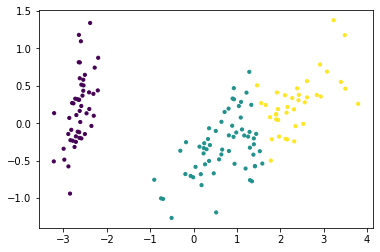

In [51]:
plt.scatter(iris_frm['pca_x'] , iris_frm['pca_y'],
            marker = 'o' , 
            c = iris_frm['cid'] , 
            s = 10)
plt.show()
plt.close()

In [52]:
print('차원축소시 피처의 유닛이 다를경우 - 스케일링이 필요하다')
print()

차원축소시 피처의 유닛이 다를경우 - 스케일링이 필요하다



In [56]:
def feature_scaling(method='None' , input_data = None) :
    if method == 'standard' :
        return StandardScaler().fit_transform(input_data)
    if method == 'minmax' :
        return MinMaxScaler().fit_transform(input_data)

In [57]:
std_scaler = feature_scaling(method='standard' , 
                input_data = iris_frm.iloc[ :  , : 4])
std_scaler

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [58]:
iris_pca = PCA(n_components = 2) 

iris_pca_trans = iris_pca.fit_transform(std_scaler)
iris_pca_trans 

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [59]:
iris_frm['std_pca_x'] = iris_pca_trans[ : , 0]
iris_frm['std_pca_y'] = iris_pca_trans[ : , 1]
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target,pca_x,pca_y,std_pca_x,std_pca_y
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755,-2.389842,0.646835
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532,1.870503,0.386966
146,6.3,2.5,5.0,1.9,1,2,1.527167,-0.375317,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859,1.521170,0.269069
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628,1.372788,1.011254


In [60]:
std_iris_kmeans = KMeans(n_clusters = 3)
std_iris_kmeans.fit(iris_frm.iloc[ :  , -2 : ])

KMeans(n_clusters=3)

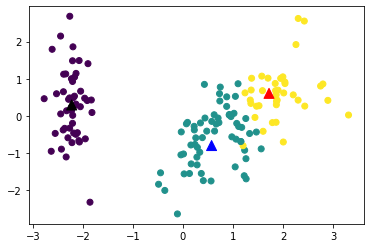

In [62]:
plt.scatter(iris_frm['std_pca_x'] ,
            iris_frm['std_pca_y'],
            c = iris_frm['cid'])

plt.scatter(std_iris_kmeans.cluster_centers_[ : , 0] , 
            std_iris_kmeans.cluster_centers_[ : , 1],
            marker = '^' , 
            c = ['r', 'k' , 'b'] , 
            s = 100)

plt.show()
plt.close()

#### KMeans [실습]
- wholesale customers(도매업 고객)

In [63]:
customer_frm = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
customer_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [64]:
customer_frm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [65]:
customer_frm.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [66]:
customer_frm['Channel'].unique()

array([2, 1], dtype=int64)

In [67]:
customer_frm['Region'].unique()

array([3, 1, 2], dtype=int64)

In [68]:
X = customer_frm.iloc[:,:]
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [70]:
scaler_X = feature_scaling(method='standard' , input_data = X)
scaler_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [73]:
print('군집모형 - ')
kmeans = KMeans(n_clusters = 5) 
kmeans.fit(scaler_X)
print('군집 예측 - ')
print(kmeans.labels_)
print()
print('군집 중앙 위치 - ')
print(kmeans.cluster_centers_)

군집모형 - 
군집 예측 - 
[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 2 0 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 2 0 0 1 1 0 0 1 1 2 0 1 1 0 2 0 0 1 2 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 0 0 1 0 2 2 1 1 1 1 1 2 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 4 1
 1 1 1 0 0 1 1 1 0 1 1 3 0 3 3 0 0 3 3 3 0 3 3 3 0 3 2 3 3 0 3 0 3 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 0 3 0 3 0 3 3 3 3 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 3 0
 3 0 0 3 0 0 0 0 0 0 0 3 3 0 3 3 0 3 3 0 3 3 3 0 3 3 3 3 3 4 3 3 3 3 3 0 3
 2 3 0 3 3 3 3 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]

군집 중앙 위치 - 
[[ 1.44865163e+00  1.66562579e-01 -3.26341681e-01  4.22850268e-01
   6.596197

In [74]:
X['cid'] = kmeans.labels_
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cid
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [75]:
customer_pca = PCA(n_components = 2) 

customer_pca_trans = customer_pca.fit_transform(scaler_X)
customer_pca_trans 

array([[ 8.43938928e-01, -5.15350749e-01],
       [ 1.06267645e+00, -4.84601258e-01],
       [ 1.26914052e+00,  6.82054553e-01],
       [-1.05678239e+00,  6.10821496e-01],
       [ 6.34030484e-01,  9.74198836e-01],
       [ 5.30110898e-01, -5.85411382e-01],
       [ 3.99560245e-01, -8.46342878e-01],
       [ 7.91165650e-01, -4.61140175e-01],
       [-6.63831131e-01, -5.77465454e-01],
       [ 2.15068480e+00, -6.17913981e-01],
       [ 1.25599389e+00, -5.12452434e-01],
       [-1.68210612e-01, -6.88796117e-01],
       [ 1.43985588e+00,  6.08852947e-01],
       [ 1.40695611e+00, -1.60564663e-01],
       [ 1.37395999e+00,  6.85013841e-02],
       [-1.07181521e+00, -5.19859188e-01],
       [ 1.25801233e+00, -1.12165441e+00],
       [-6.18599013e-01,  2.82406711e-01],
       [ 8.67093429e-01,  2.20448419e-01],
       [-4.84666795e-01, -5.76463994e-01],
       [ 3.31514687e-01, -1.94171620e-01],
       [-1.25444108e+00, -3.05734448e-01],
       [-6.95754707e-01,  2.16418147e+00],
       [ 4.

In [76]:
X['std_pca_x'] = customer_pca_trans[ : , 0]
X['std_pca_y'] = customer_pca_trans[ : , 1]
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cid,std_pca_x,std_pca_y
0,2,3,12669,9656,7561,214,2674,1338,0,0.843939,-0.515351
1,2,3,7057,9810,9568,1762,3293,1776,0,1.062676,-0.484601
2,2,3,6353,8808,7684,2405,3516,7844,0,1.269141,0.682055
3,1,3,13265,1196,4221,6404,507,1788,1,-1.056782,0.610821
4,2,3,22615,5410,7198,3915,1777,5185,0,0.634030,0.974199
...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1,0.222884,2.480505
436,1,3,39228,1431,764,4510,93,2346,1,-1.290172,1.560397
437,2,3,14531,15488,30243,437,14841,1867,0,3.865149,-0.479854
438,1,3,10290,1981,2232,1038,168,2125,1,-1.097067,-0.069896


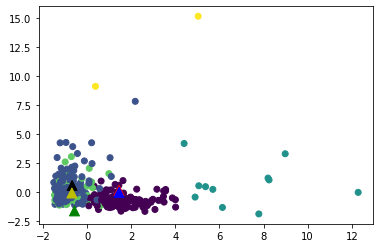

In [77]:
plt.scatter(X['std_pca_x'] ,
            X['std_pca_y'],
            c = X['cid'])

plt.scatter(kmeans.cluster_centers_[ : , 0] , 
            kmeans.cluster_centers_[ : , 1],
            marker = '^' , 
            c = ['r', 'k' , 'b' , 'g' , 'y'] , 
            s = 100)

plt.show()
plt.close()

#### 고등학교 진학률 데이터를 활용하여 속성이 비슷한 중학교끼리 클러스터 [실습]
- 데이터 인코딩 , 지도시각화(위도, 경도, folium)

In [79]:
school_frm = pd.read_excel('./data/middle_shcool_graduates_report.xlsx' , 
                          header = 0)
school_frm.head(1)

,Unnamed: 0,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,...,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,...,0.007,0.0,0.011,0.227,0.0,0.004,0,0.0,37.594942,127.038909


In [80]:
school_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    int64  
 1   지역          415 non-null    object 
 2   학교명         415 non-null    object 
 3   코드          415 non-null    int64  
 4   유형          415 non-null    object 
 5   주야          415 non-null    object 
 6   남학생수        415 non-null    int64  
 7   여학생수        415 non-null    int64  
 8   일반고         415 non-null    float64
 9   특성화고        415 non-null    float64
 10  과학고         415 non-null    float64
 11  외고_국제고      415 non-null    float64
 12  예고_체고       415 non-null    float64
 13  마이스터고       415 non-null    float64
 14  자사고         415 non-null    float64
 15  자공고         415 non-null    float64
 16  기타진학        415 non-null    float64
 17  취업          415 non-null    int64  
 18  미상          415 non-null    float64
 19  위도          415 non-null    f

In [81]:
school_frm.columns

Index(['Unnamed: 0', '지역', '학교명', '코드', '유형', '주야', '남학생수', '여학생수', '일반고',
       '특성화고', '과학고', '외고_국제고', '예고_체고', '마이스터고', '자사고', '자공고', '기타진학', '취업',
       '미상', '위도', '경도'],
      dtype='object')

In [82]:
import folium

In [84]:
school_map = folium.Map(location=[37.566565389597955, 126.9779241708451] , 
                        zoom_start = 12 , 
                        tiles = 'Stamen Toner')
for name, lat, lng in zip(school_frm['학교명'], school_frm['위도'], school_frm['경도']) :
    folium.Marker(
        [lat, lng]   , 
        popup = name ,
        icon  = folium.Icon(color = 'red')
    ).add_to(school_map)
    
school_map

### 진행절차
#### step01. 데이터 전처리 - (지역, 코드 , 유형, 주야)
#### step02. 군집모형생성 - 분석에 사용할 피처는 과학고, 외고국제고, 자사고 진학률
#### step03. 표준화
#### step04. 모형 객체 생성
#### step05. 모형 학습
#### step06. 예측
#### step07. 예측 결과를 데이터 프레임에 추가
#### step08. 클러스터 값으로 그룹화, 그룹별 내용 출력
#### step09. 지도 그래프 시각화

In [86]:
print('step01. - ')
school = school_frm.iloc[ : , : ]
label_encoder = LabelEncoder()
school['지역'] = label_encoder.fit_transform(school['지역'])
school['코드'] = label_encoder.fit_transform(school['코드'])
school['유형'] = label_encoder.fit_transform(school['유형'])
school['주야'] = label_encoder.fit_transform(school['주야'])

step01. - 


In [88]:
school.head()

,Unnamed: 0,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,...,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,0,16,서울대학교사범대학부설중학교,0,1,0,277,0,0.585,0.148,...,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,1,22,서울대학교사범대학부설여자중학교,0,1,0,0,256,0.680,0.199,...,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,2,0,개원중학교,0,0,0,170,152,0.817,0.047,...,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,3,0,개포중학교,0,0,0,83,72,0.755,0.097,...,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,4,14,경원중학교,0,0,0,199,212,0.669,0.017,...,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900
